In [21]:
import sys 
sys.path.append('../../')  
from main import device_process_measurement_tomography, Quantities, Cross_Quantities
import QuantumTomography as qt 
import matplotlib.pyplot as plt 
import numpy as np 
from qiskit import QuantumCircuit, Aer, IBMQ 
from qiskit.compiler import transpile 
import json 
from qiskit.result import Result 
from qiskit.test.mock import FakeCasablanca 
from utils_qiskit import * 
from utils_plots import *
from qiskit.providers.ibmq.managed import IBMQJobManager

In [22]:
IBMQ.load_account()
provider    = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')
backend     = provider.get_backend('ibm_perth')
job_manager = IBMQJobManager() 

ibmqfactory.load_account:WARNING:2022-10-26 13:34:16,845: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
jobs       = '7ce83169d75d4115a8dd2e839692d898-16655968534771705'

In [24]:
result_set = job_manager.retrieve_job_set(jobs, provider).results()
results    = result_set.combine_results()
save_results( results, jobs )

KeyboardInterrupt: 

In [ ]:
dpmt = device_process_measurement_tomography( backend )
circuits_dpmt = dpmt.circuits()

In [ ]:
results_tomography = dpmt.fit( results, paralell=True, gate_set=True )         
results_single     = results_tomography.single                             
results_double     = results_tomography.double                            
results_gateset    = results_tomography.gateset     
np.save( 'data_tomo'+jobs, np.array(results_tomography, dtype=object) )                       

[<Axes3DSubplot:>, <Axes3DSubplot:>]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


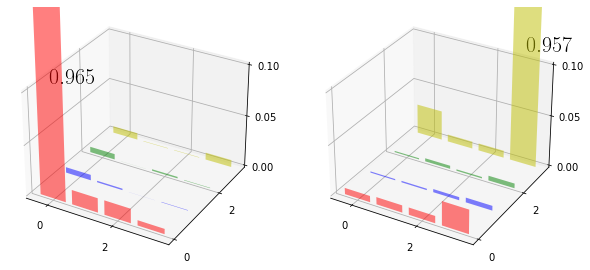

In [ ]:
choi_single=results_single.chois
povm_single=results_single.povms
choi_single_mean = np.mean(choi_single, axis=0)
Plot_Chois( choi_single_mean )

[<Axes3DSubplot:>, <Axes3DSubplot:>, <Axes3DSubplot:>, <Axes3DSubplot:>]

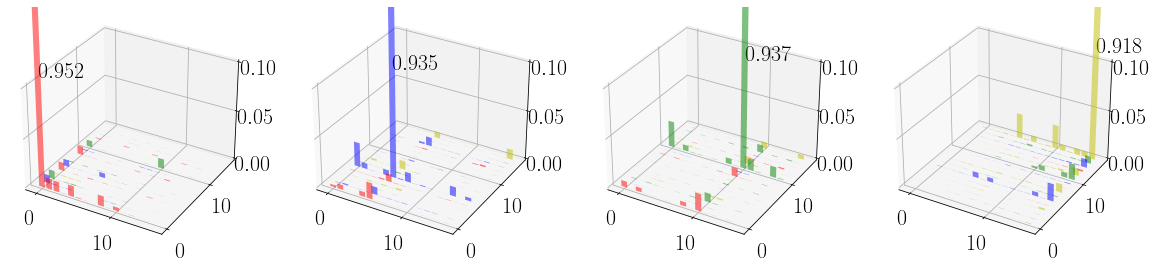

In [ ]:
choi_double = [ results_double[j].chois for j in range(3)]
povm_double = [ results_double[j].povms for j in range(3)]
choi_double_mean = np.mean( choi_double, axis=(0,1) )
Plot_Chois( choi_double_mean )

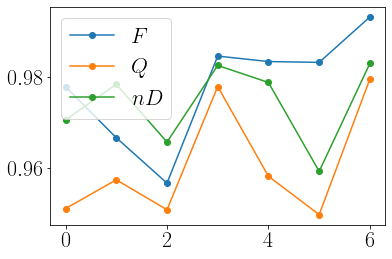

In [ ]:
quantities_single = []
for j in range(7):
    quantities_single.append( Quantities( povm_single[j], choi_single[j] ) )
plt.plot( quantities_single, '-o', label=['$F$','$Q$','$nD$'] )
plt.legend()

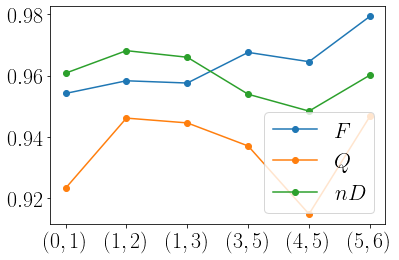

In [ ]:
order_pairs = [ 3, 4, 0, 2, 1, 5 ]
pairs = [ [(1,3),(4,5)], [ (3,5),(0,1) ], [(1,2),(5,6)]    ]
quantities_double = []
for j in range(3):
    for k in range(2):
        quantities_double.append( Quantities( povm_double[j][k], choi_double[j][k] ) )
plt.plot( np.array(quantities_double)[order_pairs], '-o', label=['$F$','$Q$','$nD$'] )
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.legend()

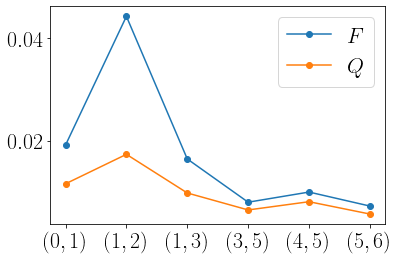

In [ ]:
pairs = [ [(1,3),(4,5)], [ (3,5),(0,1) ], [(1,2),(5,6)]    ]
correlations = []
for j in range(3):
    for k in range(2):
        q0, q1 = pairs[j][k]   
        correlations.append( Cross_Quantities( povm_single[q0], choi_single[q0],
                                                povm_single[q1], choi_single[q1],
                                                povm_double[j][k], choi_double[j][k] ) )

plt.plot( np.array(correlations)[order_pairs], '-o', label=['$F$','$Q$'] )
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.legend()